# Fundamentals of Visualizations

- DS-Flex
- Hosted by James Irving
- 09/07/21

## Learning Objectives

- Discuss an overview of the types of visualizations available.
- Discuss which types of visuals are best for showing what type of information/comparisons.


- Discuss the Anatomy of a Matplotlib Figure

- Discuss the many ways to create/start a figure
    - Matplotlib plt functions
    - Matploltib OOP interface
    - Pandas
    - Seaborn
- Overhauling the Aesthetics with Matplotlib styles and seaborn contexts.

- Activity: Answering Questions via EDA

## Prerequisites

- To get the most out of this study group, you should have already learned how to work with Panda's DataFrames (Topic 04)

# Types of Data Visualizations

## Data Visualization Overview

- We use visualizations to tell a story about our data. 
    - Knowing which visualization is best to tell the story you are trying to tell is an important skill. 


- Let's Explore Different Types of Visualizations and when they are most appropriate to use. 

    - **[The Data Viz Project](https://datavizproject.com/)**

    - [Blog Post: How to Choose a Chart Type](https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6)
    - **[Python Graph Gallery](https://www.python-graph-gallery.com/)**




### Example Galleries [Python Packages]
Let's explore the Python-specific options available to us. 



- [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
- [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
- [Plotly Express](https://plotly.com/python/plotly-express/)

# Using Visualizations to Answer Stakeholder Questions

## Business Case

- A home owners association from Ames, Iowa has hired us to provide some insights on the prices of homes in the area.  They have provided us with some data on house sales in the region, as well as a list of questions they'd like answered.

    - They want an answer within a few hours, so we don't have time to perform any modeling to get machine-learning-based insights. 

- We will therefore use the appropriate visualizations to answer their questions in visual-form.


<img src="https://www.brickunderground.com/sites/default/files/styles/blog_primary_image/public/blog/images/080818_desmoinesmain.jpg" width=50%>

### The Questions to Answer

1. What is the distribution of house prices in Ames, Iowa?
    - What is the median home price?
    - What is the average home price?
    

2. What is the relationship between square footage of the living area (`GrLivArea`)  and sale price (`SalePrice`)?
    
2. What is the average sale price for each of the different types of homes (BldgType)?

### The Provided Data

In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

print('- Package Versions:')
print(f'\tMatplotlib = {mpl.__version__}')
print(f'\tPandas = {pd.__version__}')
print(f'\tSeaborn = {sns.__version__}')

plt.style.use('fivethirtyeight')

- Package Versions:
	Matplotlib = 3.3.1
	Pandas = 1.1.3
	Seaborn = 0.11.0


In [105]:
## From https://github.com/learn-co-curriculum/dsc-regression-boston-lab
cols_to_use = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 
          'OverallQual', 'LotArea', 'SalePrice','BldgType']

df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-regression-boston-lab/master/ames.csv',
                usecols=cols_to_use
                )
display(df.head())
df.info()

,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,MoSold,YrSold,SalePrice
0,8450,1Fam,7,5,2003,2003,1710,2,8,0,2,2008,208500
1,9600,1Fam,6,8,1976,1976,1262,2,6,1,5,2007,181500
2,11250,1Fam,7,5,2001,2002,1786,2,6,1,9,2008,223500
3,9550,1Fam,7,5,1915,1970,1717,1,7,1,2,2006,140000
4,14260,1Fam,8,5,2000,2000,2198,2,9,1,12,2008,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   BldgType      1460 non-null   object
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   FullBath      1460 non-null   int64 
 8   TotRmsAbvGrd  1460 non-null   int64 
 9   Fireplaces    1460 non-null   int64 
 10  MoSold        1460 non-null   int64 
 11  YrSold        1460 non-null   int64 
 12  SalePrice     1460 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 148.4+ KB


# The Many Ways of Making a Figure in Python

- There are MANY ways to make data visualizations with Python. 
- Today, we will focus on non-interactive visualizations.( Sorry, Plotly Express :*-( )

- The ~4 Different Ways to Plot with Python:

    1. Matplotlib plt functions:
        - `plt.plot`/`.bar`,`.scatter`, etc.      
    2. Matploltib OOP interface:
       ```python 
       fig, ax =plt.subplots()
       ax.plot#/ax.scatter, ax.bar, etc
        ```
        
    3. Pandas:
        ```python
         ax = df.plot()
         ax.set(#...
        ```
        
    4. Seaborn:
        ```python
         sns.histplot
         sns.regplot
         sns.scatter
        ```  

- **All 4 of these approaches to making figures with Python ultimately use matplotlib behind the scenes.**

> For this section of the notebook, we will focus on answering one question in each of the 4+ different ways. 
> #### Q1: What is the distribution of house prices in Ames, Iowa?

## Method 01: Using Matplotlib Plt Functions

- Select the correct plt function and plot the data.
- Make sure that:
    - We have an xlabel,ylabel, and title.
    - the figure is large enough
- Add a vertical line for the mean, including a label with the mean. 
    - Make sure its: 
        - Different color than the bars
        - a dotted line
- Add a legend 

#### Plot 1: Sale Price Distribution

In [106]:
mean = df['SalePrice'].mean()
mean 

180921.19589041095

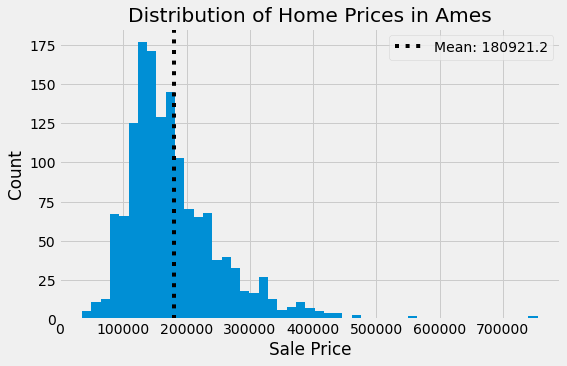

In [107]:
#Plot 1: Sale Price Distribution
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins="auto");
plt.ylabel("Count")
plt.xlabel("Sale Price")
plt.title("Distribution of Home Prices in Ames")

plt.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
plt.legend();

## Method 02: Using Matplotlib OOP Interface

#### A Tale of Two Syntaxes
-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

<!-- - [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters. -->

>- ***So... what are "object-oriented-methods" anyway?***

### OOP Crash Course

- **Object-Oriented Programming (OOP):**
    - OOP is all about working with Classes, which are the blueprints for a type of variable. 
    - Objects/classes can have functions that are attached to the object. 
        - When a function is attached to a class its called a **method**
    - Object can also store variables inside themselves. 
        - When a variable is attached to an object it is called an **attribute**
        
        
- OOP Examples You already Know:
    - `pd.DataFrame` is a class
    - `df = pd.DataFrame(...)` creates a dataframe object.
    - DataFrames have **atrributes**:
        - `df.columns`
        - `df.index`
        - `df.dtypes`
    - DataFrames have **methods**
        - `df.head()`
        - `df.sort_values()`
        - `df.info()`
        - `df.dropna()`
        - `df.plot()`
        
        
- You will learn about classes in Phase 3.
        

### Anatomy of a Matplotlib Figure



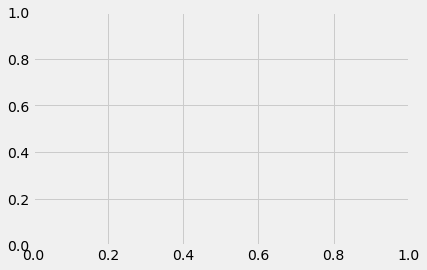

In [108]:
## Make an empty figure and ax with plt.subplots
fig, ax = plt.subplots()

<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>

- Matplotlib Figures are composed of 3 different types of objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure

        

In [109]:
## Run help on fig 
# help(fig)

#### Anatomy of an Axes
- `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`
- Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.

    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
    
- However, axes do NOT actually contain the VISUAL for the figure, just the information.
  

In [110]:
# Run help on ax


#### Now, let's make our figure with Method 02

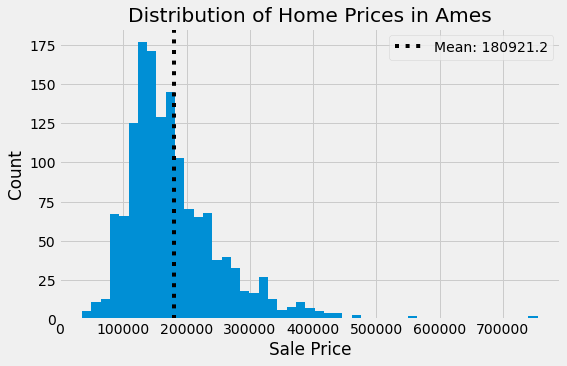

In [111]:
#Plot 1: Sale Price Distribution - OOP
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(df['SalePrice'], bins="auto");
ax.set_ylabel("Count")
ax.set_xlabel("Sale Price")
ax.set_title("Distribution of Home Prices in Ames")

ax.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
ax.legend();

> Note: if you don't need to customize fonts, you can **combine all `ax.set_xxxx(` commands (`ax.set_title`,`ax.set_xlabel`, etc) into 1 `ax.set()`

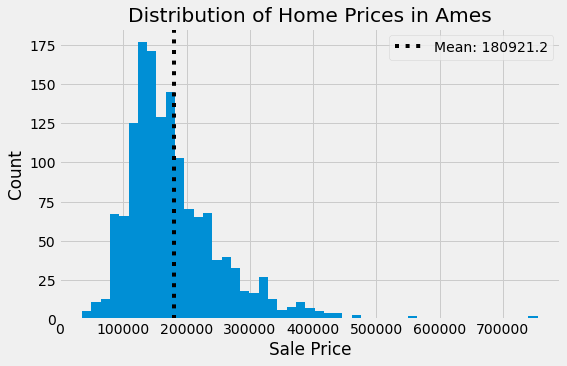

In [112]:
#Plot 1: Sale Price Distribution - OOP with ax.set()
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(df['SalePrice'], bins="auto");
ax.set(ylabel="Count", xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

ax.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
ax.legend();

## Method 03: Plot with Pandas

- Pandas's dataframes and series have a `.plot()` method
    - [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
    - The `kind` argument lets us specify if we want: 
        - "scatter"
        - "hist"
        - "bar"
        - "barh"
        - etc.
    - There are also some additional plotting methods:
        - e.g.: `df.hist()`

In [115]:
# Plot 1: Sale Price Distribution - pandas .plot kind=hist
# df["SalePrice"].plot(kind='hist',bins='auto')

>- Unfortunately .plot isn't perfect, which is why we also have `df.hist`

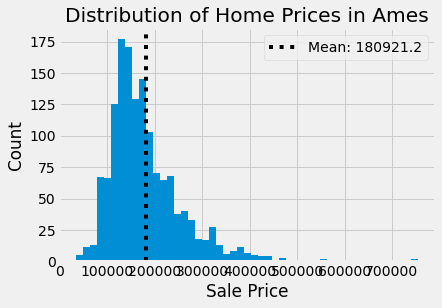

In [116]:
#Plot 1: Sale Price Distribution - pandas .hist
ax = df["SalePrice"].hist(bins='auto')
ax.set(ylabel="Count", xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

ax.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
ax.legend();

## Method 04: Seaborn

- Seaborn has 2 different kinds of plotting functions. Basic ones that return an ordinary matplotlib axis and fancy/advanced ones that return an object called a "FacetGrid"


- Basic Functions (return an `ax`)
    ```python
    sns.histplot
    sns.regplot
    sns.scatter
    ```
- Advanced Functions (return a `FacetGrid`)
    ```python
    sns.lmplot
    sns.catplot
    sns.jointplot
    ```
    
- We will make our histogram 2 different ways with Seaborn. 
    - The simpler `sns.histplot` function.
    - The complex `sns.displot` function

### Seaborn - Simple Plot (returns an ax)

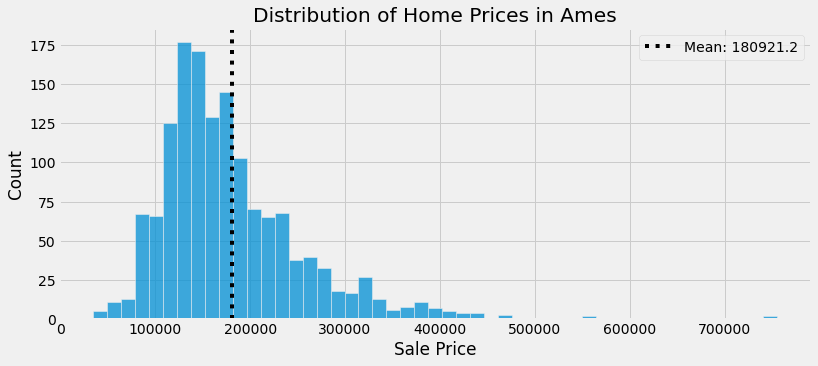

In [137]:
## PLot 1 - seaborn histplot
plt.figure(figsize=(12,5))
ax = sns.histplot(data=df, x='SalePrice')
ax.set(ylabel="Count", xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

ax.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
ax.legend();

### Seaborn - Advanced Plot (returns a FacetGrid)

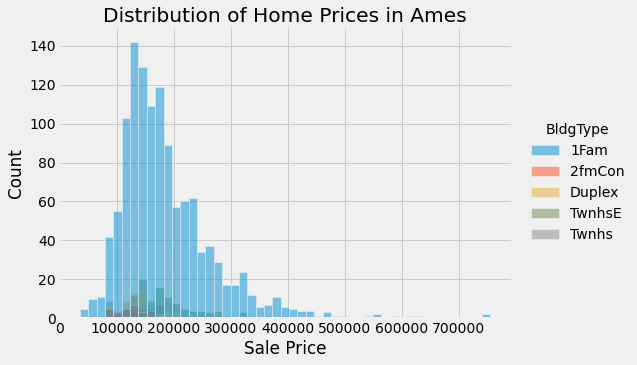

In [118]:
## PLot 1 - seaborn displot
g = sns.displot(data=df, x='SalePrice',hue='BldgType',aspect=1.5)
g.set(ylabel="Count", xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

# g.ax.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
# g.ax.legend();

# 🕹Activity: Answering Stakeholder Questions with EDA

## The Questions to Answer

1. What is the distribution of house prices in Ames, Iowa?
    - What is the median home price?
    - What is the average home price?
    

2. What is the relationship between square footage of the living area (`GrLivArea`)  and sale price (`SalePrice`)?
    
2. What is the average sale price for each of the different types of homes (BldgType)?

## Q1: What is the distribution of house prices in Ames, Iowa? 

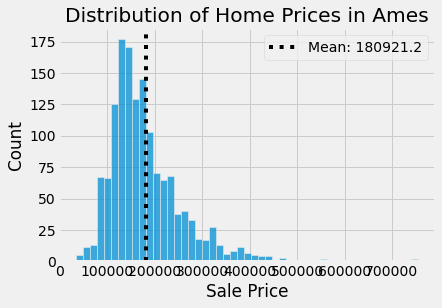

In [119]:
## PLot 1 - seaborn histplot
ax = sns.histplot(data=df, x='SalePrice')
ax.set(ylabel="Count", xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

ax.axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
ax.legend();

### Customizing Xtick Label Formatting

#### Adding "\$" and "," thousands separator  

- [Tick Formatters Examples](https://matplotlib.org/stable/gallery/ticks_and_spines/tick-formatters.html)
    - [**Reference: String Format Codes**](https://mkaz.blog/code/python-string-format-cookbook/)
- [Tick Locator Examples](https://matplotlib.org/stable/gallery/ticks_and_spines/tick-locators.html)


- Let's make our price ticks look more professional
    - Add $'s 
    - Add , separator for thousands
    - Show 2 decimal places
    
- [Tutorial Example](https://matplotlib.org/stable/gallery/pyplots/dollar_ticks.html?highlight=tick)

<ipython-input-146-8e532b394512>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)


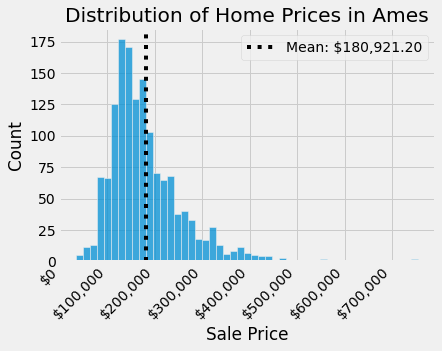

In [146]:
from matplotlib.ticker import StrMethodFormatter
## Make a larger fig/ax before plotting

ax = sns.histplot(data=df, x='SalePrice')
ax.set(ylabel="Count", xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

ax.axvline(mean,color='k',ls=":",label=f'Mean: ${mean:,.2f}')
ax.legend();

## Make price_fmt using the StrMethodFormatter and the appropriate format code 
price_fmt = StrMethodFormatter('${x:,.0f}')
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45)
## Set the major formatter for the xaxis
ax.xaxis.set_major_formatter(price_fmt)

#### How to Suppress Warning Messages

- While the pink warnings above are not an error, they are **ugly**
- You can turn off warning messages, but **you should only do this for the final version of a project notebook.**

- To prevent warnings from appearing, we can run the following code:

```python
import warnings
warnings.filterwarnings('ignore')
```

In [121]:
import warnings


#### Converting "\\$700,000" Dollars to "\\$700K"

- Example: How to use the FuncFormatter to convert \\$'s to millions of \\$'s.
- To use the Function Formatter:
    - Create a function that accepts 2 arguments: `x` and `pos`
    - Use f-strings and format codes to specify how to change x. 
    - e.g. `f"${x*1e-6:,}M"` would convert "2,000,000" -> "$2M"


```python
from matplotlib.ticker import FuncFormatter

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-6:,}M"

# Create the formatter
price_fmt_mill =FuncFormatter(millions)

## Make the scatter plot
ax = df.plot(kind='scatter',y='Profit',x='Budget')

## Set the axis' major formatter
ax.yaxis.set_major_formatter(price_fmt_mill)
```
<!--
```python
def billions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in billions"""
    return f"$ {x*1e-9:,}B"


def get_funcformatter(kind='m'):
    """Returns a matplotlib FuncFormatter for formatting currecny in millions or billions
    
    Args:
        kind (str): which order of magnitude to use. Default is 'm'. 
                    m=Millions, b=Billions
    """
    if kind.lower()=='m':
        func = millions
    elif kind.lower()=='b':
        func = billions
    return FuncFormatter(func)
```
-->

In [122]:
from matplotlib.ticker import FuncFormatter
## Make a "hundred_thousands" function 


In [123]:
## Make a larger fig/ax before plotting



## Create price_fmt_thous using the  FuncFormatter and our function



### A1

-   

## Q2: What is the relationship between square footage of the living area (GrLivArea) and sale price (SalePrice)?

- Figure Requirements:
    - Markers are small enough to see distinct dots
    - Price-Formatted y axis
    - Regression line added 
    - Make sure the regression line is easily distinguishable vs the markers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

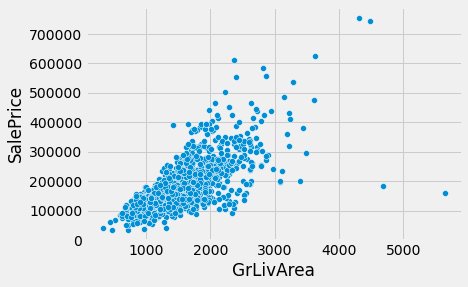

In [124]:
## Plot 2 with seaborn - scatterplot
sns.scatterplot(data=df, x='GrLivArea',y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

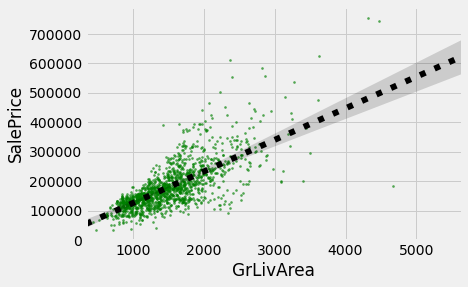

In [125]:
## Plot 2 with seaborn + regression line
sns.regplot(data=df, x='GrLivArea',y='SalePrice',
            scatter_kws={'s':3,'color':'green','alpha':0.5},
            line_kws={'ls':':','color':'black'})

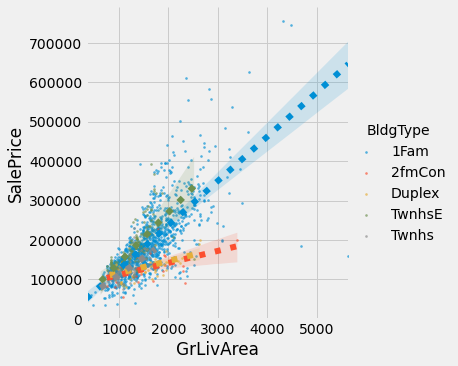

In [126]:
## Plot 2 with seaborn + regression line
sns.lmplot(data=df, x='GrLivArea',y='SalePrice',hue='BldgType',
           
            scatter_kws={'s':3,'alpha':0.5},
            line_kws={'ls':':'})

### A2

-   

## Q3: What is the average sale price for each of the different types of homes (BldgType)?

- Figure Requirements:
    - Bars are sorted in order from largest to smallest mean.
    - Bars have error bars added
    - Price-Formatted y axis

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

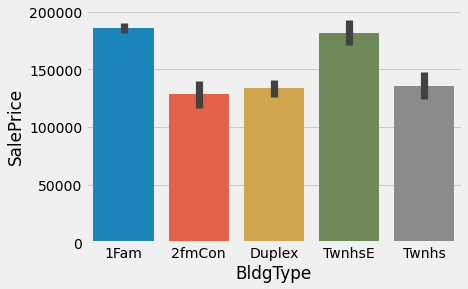

In [127]:
# Use sns.barplot to plot blgdtype vs saleprice (dont worry about order of bars yet)
sns.barplot(data=df,x='BldgType',y='SalePrice')

In [140]:
df.median()

LotArea           9478.5
OverallQual          6.0
OverallCond          5.0
YearBuilt         1973.0
YearRemodAdd      1994.0
GrLivArea         1464.0
FullBath             2.0
TotRmsAbvGrd         6.0
Fireplaces           1.0
MoSold               6.0
YrSold            2008.0
SalePrice       163000.0
dtype: float64

In [143]:
df.groupby('BldgType')['SalePrice'].agg(np.median)

BldgType
1Fam      167900
2fmCon    127500
Duplex    135980
Twnhs     137500
TwnhsE    172200
Name: SalePrice, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

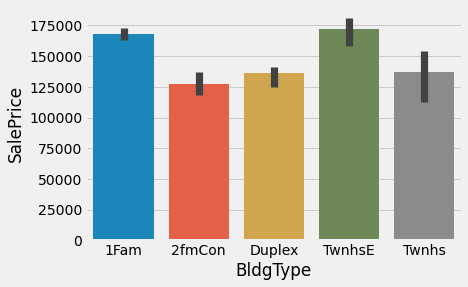

In [138]:
sns.barplot(data=df,x='BldgType',y='SalePrice',estimator=np.median)

#### Plot 3: Average Sale Price by BldgType

In [128]:
# Use sns.barplot to plot blgdtype vs saleprice - ordered correctly
## First, calculate the correct order for the bars


In [129]:
## Now use the info from abvoe to order the bars


### A3

-   

### EDA Wrap Up

- We did it! We used our awesome visualization techniques to provide visual answers to real questions. 
- We chose the ideal figures to best answer the questions.

# BRANCH/DECISION POINT:

- IF we are low on time, which would we rather cover?
    - A) Multiple subplots
    - B) Customizing aesthetics

## More Advanced Plots - Subplots

- Combine our plots for Q2 and Q3 into 1

In [130]:
axes[0].boxplot()

TypeError: boxplot() missing 1 required positional argument: 'x'

(6,)


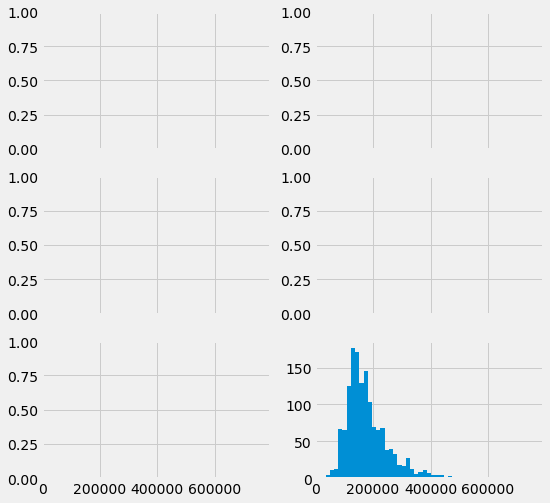

In [131]:
# Combined subplots
fig, axes = plt.subplots(sharex=True,nrows=3,ncols=2,figsize=(8,8))
axes= axes.flatten()
print(axes.shape)
axes[5].hist(df['SalePrice'],bins='auto');

In [132]:
### Plot 0
axes[0].hist(df['SalePrice'],bins='auto')
axes[0].set(ylabel="Count", #xlabel="Sale Price",
       title="Distribution of Home Prices in Ames")

axes[0].axvline(mean,color='k',ls=":",label=f'Mean: {round(mean,2)}')
axes[0].legend();

### Plot 1
axes[1].boxplot(df['SalePrice'],vert=False)
axes[1].set(xlabel="SalePrice")
## Fix overlap
plt.tight_layout()

## Add suptitle big and bold

<Figure size 432x288 with 0 Axes>

In [133]:
## past the full thing into thsi cell and make a function
## make it takes the df and lets move the suptitle to the function definiton


# Customizing Figure Aesthetics

## Quick & Easy Visual Overhaul

### Matplotlib Styles
- https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [ ]:
## List of available styles
plt.style.available

In [ ]:
# plt.style.use('')

In [ ]:
## loop through all styles and use our plotting function.

for style in plt.style.available:
    with plt.style.context(style):
        ax = sns.barplot(data=df,x='BldgType',y='SalePrice')     
        ax.set_title(style)
        plt.show()


>- Once you've found a style and want to apply it to the entire notebook, add the following command at the top of your notebook right after importing matplotlib
```python 
plt.style.use('seaborn-talk')
```

### Seaborn Themes/Contexts/Colorpalette

- https://seaborn.pydata.org/api.html#themeing
- https://seaborn.pydata.org/tutorial/color_palettes.html

In [134]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

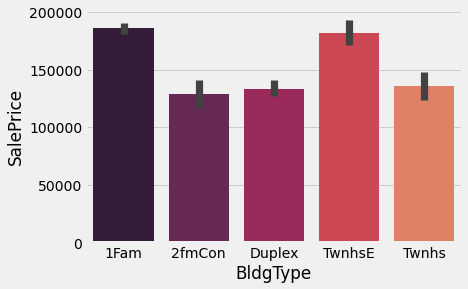

In [135]:
palette = sns.color_palette('rocket')
sns.barplot(data=df,x='BldgType',y='SalePrice',palette=palette)

In [ ]:
sns.set_palette('rocket')
final_eda_figure(df)

# All Resources:


### **Matplotlib Documentation**
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)

- [Tick Formatters](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html)


### Cheat Sheets

- [Matplotlib and Seaborn Pages in our Master Cheat sheets pdf](https://drive.google.com/open?id=1PxRAhlaK7ucf0S2F732eJ94ovaPtUSE_)

- **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

# APPENDIX

## Alternative Plots For Each Q

### Q2 Alternatives

#### Plot 2: Sqft Living Area vs Sale Price - plt functions

In [ ]:
# Plot 2: sqft vs sale price
plt.figure(figsize=(8,4))
plt.scatter(df['GrLivArea'], df['SalePrice'],s=2)
plt.ylabel('Sale Price ($)')
plt.xlabel('Sqft Living Area')
plt.title('Sqft vs Sale Price');

#### Plot 2: Sqft Living Area vs Sale Price - oop

In [ ]:
## Plot 2 with OOP
fig,ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'],s=2)
ax.set_ylabel('Sale Price ($)')
ax.set_xlabel('Sqft Living Area')
ax.set_title('Sqft vs Sale Price');

In [ ]:
# Plot 2 with OOP and .set()
fig,ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'],s=2)
ax.set(ylabel='Sale Price ($)', xlabel='Sqft Living Area', title='Sqft vs Sale Price');

#### Plot 2: Sqft Living Area vs Sale Price

In [ ]:
## Plot 2 with pandas
df.plot(kind='scatter',x='GrLivArea', y='SalePrice',s=2,title='Sqft vs Sale Price');

## Q3 Alternatives

#### Plot 3: Average Sale Price by BldgType

In [ ]:
# Prepare Data - Plot 3: avg sale price by blgtype
bldgtype_means = df.groupby('BldgType').mean()['SalePrice']
bldgtype_means

In [ ]:
# Plot 3: avg sale price by blgtype
plt.bar(bldgtype_means.index, bldgtype_means.values)
plt.ylabel('Mean Sale Price ($)')
plt.xlabel('Building Type')
plt.title('Average Sale Price by Building Type');

#### Plot 3+Level Up: Average Sale Price by BldgType - with Error Bars

In [ ]:
# Level Up - Prepare Data - Plot 3: avg sale price by blgtype
bldgtype_means = df.groupby('BldgType').agg(['mean','std','count'])['SalePrice']
bldgtype_means['Std Error'] = bldgtype_means['std']/ np.sqrt(bldgtype_means['count'])
bldgtype_means

In [ ]:
# Plot 3-LevelUp: avg sale price by blgtype
plt.bar(bldgtype_means.index, bldgtype_means['mean'],yerr = bldgtype_means['Std Error'])
plt.ylabel('Mean Sale Price ($)')
plt.xlabel('Building Type')
plt.title('Average Sale Price by Building Type');

### Method 02: Using Matplotlib OOP Interface

In [ ]:
# Prepare Data - Plot 3: avg sale price by blgtype
bldgtype_means = df.groupby('BldgType').mean()['SalePrice']
bldgtype_means

In [ ]:
# Plot 3: avg sale price by blgtype
fig,ax = plt.subplots()
ax.bar(bldgtype_means.index, bldgtype_means.values)
ax.set(ylabel='Mean Sale Price ($)', xlabel='Building Type', 
       title='Average Sale Price by Building Type');

### Method 03: Pandas

#### Plot 3: Average Sale Price by BldgType

In [ ]:
df.groupby('BldgType').mean()['SalePrice'].plot(kind='bar');